# Agent-Based Modelling

### _Shreya Raghavendra (13756877), Boyan Mihaylov (15067602), Eline van de Lagemaat (11892900), Sofia Tavitian (14824248), Chayenne Olumuyiwa (12055662)_

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import model as mdl
import agent as agt
import visualisation as vis

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
reload(mdl)
reload(agt)

reload(mdl)
reload(agt)

<module 'agent' from 'c:\\Users\\sofia\\Documents\\Amsterdam_University\\Agent_based_modelling\\agent-based-modelling\\Project\\agent.py'>

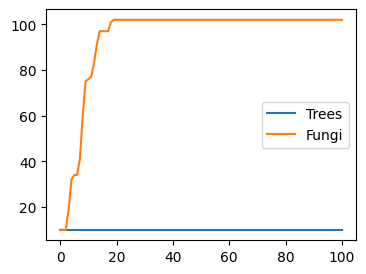

0    1.720000e+02
1    1.720004e+08
2    1.720007e+14
3    1.720011e+20
4    1.720015e+26
Name: Living Trees Total Volume, dtype: float64


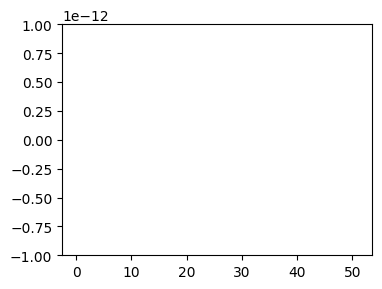

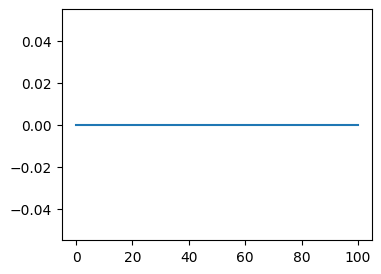

In [50]:
%matplotlib inline

width = 10
height = 10
n_init_trees = 10
n_init_fungi = 10
harvest_params = [10,0,1]
model = mdl.Forest(width, height, n_init_trees, n_init_fungi, harvest_params)
model.run_model()

data = model.datacollector.get_model_vars_dataframe()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Trees", "Fungi"]].plot(ax=ax)
plt.show()

print(data["Living Trees Total Volume"].head())

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Living Trees Total Volume"].plot(ax=ax)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Infected Trees"].plot(ax=ax)
plt.show()

In [51]:
reload(vis)
reload(agt)
reload(mdl)

reload(vis)
reload(agt)
reload(mdl)

<module 'model' from 'c:\\Users\\sofia\\Documents\\Amsterdam_University\\Agent_based_modelling\\agent-based-modelling\\Project\\model.py'>

In [53]:
model_params = {
    "n_init_trees": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "n_init_fungi": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
    "harvest_params": [10,0,1]
}

page = vis.create_jupyter_viz(mdl.Forest, model_params, measures=["Trees", "Fungi"])

page

Cannot show ipywidgets in text